# ML Case Study -Natural Language Processing (NLP)

### Import Laibraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



## Resturant Reviews | Sentiment Analysis (NLP Case-study)


Data source: https://www.kaggle.com/datasets/maher3id/restaurant-reviewstsv

### Import & Inspecting Data

In [2]:
data = pd.read_csv('data/Restaurant_Reviews.tsv',sep='\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Exploring Data

In [4]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

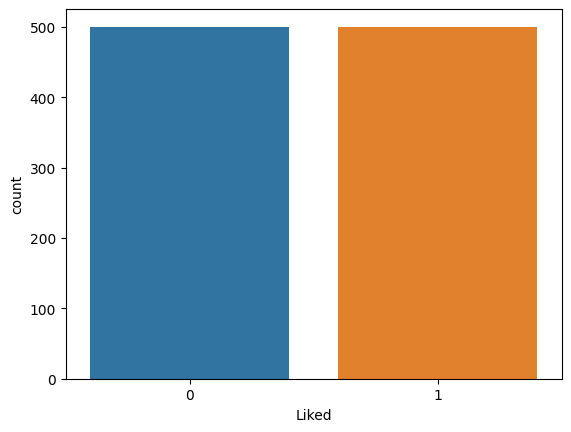

In [5]:
sns.countplot(x=data['Liked'], data=data)

In [6]:
data["Review_letter_count "] = data['Review'].apply(len)
data

,Review,Liked,Review_letter_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [7]:
#largest Review lenght
data['Review_letter_count '].max()

149

In [8]:
#largest Review index
data['Review_letter_count '].idxmax()

985

In [9]:
#The largest Review
data.iloc[data['Review_letter_count '].idxmax()]

Review                  The problem I have is that they charge $11.99 ...
Liked                                                                   0
Review_letter_count                                                   149
Name: 985, dtype: object

In [10]:
#largest Review content
data.iloc[data['Review_letter_count '].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [11]:
#largest Review classified as negative sentiment
data.iloc[data['Review_letter_count '].idxmax()][1]

0

### Preprocessing Data (NLTK Text Data Cleaning)

In [12]:
import nltk

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eslam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
# first row as example
s = data['Review'][0]
s

'Wow... Loved this place.'

In [17]:
# Remove Punctuation
import re
s = re.sub('[^a-zA-Z]'," ", s)
s

'Wow    Loved this place '

In [18]:
# convert all words innto lower case
s = s.lower()
s

'wow    loved this place '

In [19]:
# split the sentance into words
s = s.split()
s

['wow', 'loved', 'this', 'place']

In [20]:
# first way to Remove Stopwords
temp=[]
for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['wow', 'loved', 'place']

In [21]:
# second way to Remove Stopwords
[word for word in s if word not in stopwords.words('english')]

['wow', 'loved', 'place']

In [22]:
s = ' '.join(temp)
s

'wow loved place'

In [23]:
from nltk.stem import PorterStemmer

In [24]:
ps = PorterStemmer()
s = ps.stem(s)
s

'wow loved plac'

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer()

In [27]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [29]:
# Putting it all together
corups = []
for i in range(len(data)):
    Str = re.sub('[^a-zA-Z]'," ", data['Review'][i])
    Str = Str.lower()
    Str = Str.split()
    Str = [word for word in Str if word not in stopwords.words('english')]
    Str = ' '.join(Str)
    Str = ps.stem(Str)
    corups.append(Str)
corups[:10]

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch']

In [30]:
X = cv.fit_transform(corups).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [49]:
X.shape

(1000, 1994)

In [31]:
y = data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
X_train.shape

(670, 1994)

In [35]:
X_test.shape

(330, 1994)

### Model Training & Building 

## Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
clf = MultinomialNB()

In [38]:
clf.fit(X_train, y_train)

MultinomialNB()

### Model Prediction

In [39]:
y_pred = clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [40]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

### Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
accuracy_score(y_test, y_pred)

0.7303030303030303

In [43]:
confusion_matrix(y_test, y_pred)

array([[116,  57],
       [ 32, 125]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       173
           1       0.69      0.80      0.74       157

    accuracy                           0.73       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.74      0.73      0.73       330



## KNN

In [63]:
def preprocess_txt(text):
    corups = []
    Str = re.sub('[^a-zA-Z]'," ",text)
    Str = Str.lower()
    Str = Str.split()
    Str = [word for word in Str if word not in stopwords.words('english')]
    Str = ' '.join(Str)
    Str = ps.stem(Str)
    corups.append(Str)
    return " ".join(corups)

In [64]:
data['Preprocessed_Review'] = data['Review'].apply(preprocess_txt)
data.head()

,Review,Liked,Review_letter_count,Preprocessed_Review
0,Wow... Loved this place.,1,24,wow loved plac
1,Crust is not good.,0,18,crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasti
3,Stopped by during the late May bank holiday of...,1,87,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great pric


In [65]:
X = data['Preprocessed_Review']
y = data['Liked']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
print(X_train.shape)
print(y_train.shape)

(670,)
(670,)


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [69]:

#1. create a pipeline object
clf = Pipeline([
                
     ('vectorizer', CountVectorizer()),   
      ('KNN', (KNeighborsClassifier(n_neighbors=10, metric = 'euclidean')))   #using the KNN classifier with 10 neighbors 
])


#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.87      0.70       173
           1       0.69      0.32      0.44       157

    accuracy                           0.61       330
   macro avg       0.64      0.60      0.57       330
weighted avg       0.64      0.61      0.58       330



## Randomforest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,2))),                                                    #initializing the vectorizer
    ('random_forest', (RandomForestClassifier(n_estimators=50, criterion='entropy')))      #using the RandomForest classifier
])



#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       173
           1       0.83      0.49      0.62       157

    accuracy                           0.71       330
   macro avg       0.75      0.70      0.69       330
weighted avg       0.74      0.71      0.69       330



## Best model is Randon forest

### Model Deployment & Production

In [77]:
import joblib

In [78]:
joblib.dump(clf, 'resturant.pkl')

['resturant.pkl']

---------------


## Thank You!